Import the required packages

In [1]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np

Image URL $\rightarrow$ https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

Download the image and save it as `lena.png` in your working directory

Read the image using cv2

(512, 512, 3)


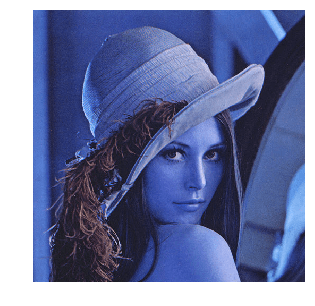

In [2]:
img = cv2.imread('lena.png')
print(img.shape)
plt.figure(figsize=(8, 5))
plt.axis("off")
plt.imshow(img)

By default cv2 reads the image in BGR (Blue Green Red) format. We need to convert the image into RGB (Red Green Blue) using `cv2.COLOR_BGR2RGB` 

(512, 512, 3)


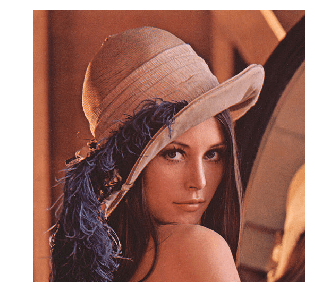

In [3]:
src = cv2.imread('lena.png')
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.figure(figsize=(8 ,5))
plt.axis("off")
plt.imshow(img)

Convert the RGB image into GRAY scale image using `cv2.COLOR_BGR2GRAY`

(512, 512)


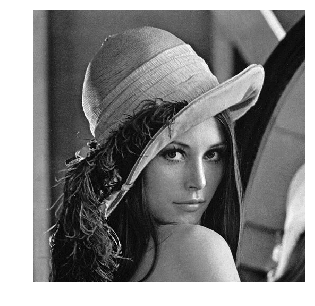

In [4]:
src = cv2.imread('lena.png')
img = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.figure(figsize=(8 ,5))
plt.axis("off")
plt.imsave('lena_gray.png', img, cmap='gray')
plt.imshow(img, cmap='gray')

### Following code is developing image convolution from scratch

Get each pixel value from the image in the form of `numpy.array()`

In [5]:
gsrc = cv2.imread('lena_gray.png', 0)
img_mat = []
for i in range(0, gsrc.shape[0]):
    row = []
    for j in range(0, gsrc.shape[1]):
        pixel = gsrc.item(i, j)
        row.append(pixel)
    img_mat.append(row)

In [6]:
img_mat = np.array(img_mat)
print(img_mat)
# print(np.pad(img_mat, 1, mode='constant'))

[[142 149 145 ...  94  94  94]
 [145 149 142 ...  97  97  97]
 [149 138 149 ...  97  94  94]
 ...
 [113 117 121 ...  32  32  32]
 [113 113 117 ...  28  28  32]
 [100 113 113 ...  28  32  36]]


Gaussian kernel for smoothening the image 

In [7]:
kernel = np.multiply(1/16, np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]))
print(kernel)
print(kernel.shape)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
(3, 3)


Get submatrices of size `kernel.shape` by padding the image matrix by `0` for data loss prevention

In [8]:
def get_sub_matrices(orig_matrix, width, height, kernel_size):
    orig_matrix = np.pad(orig_matrix, 1, mode='constant')
    giant_matrix = []
    for i in range(0, height - kernel_size[1] + 1):
        for j in range(0, width - kernel_size[0] + 1):
            giant_matrix.append(
                [
                    [orig_matrix[col][row] for row in range(j, j + kernel_size[0])]
                    for col in range(i, i + kernel_size[1])
                ]
            )
    return giant_matrix

In [9]:
width = len(img_mat[0])
height = len(img_mat)
img_sampling = get_sub_matrices(img_mat, width, height, kernel_size=kernel.shape)
img_sampling = np.array(img_sampling)
print(img_sampling)

[[[  0   0   0]
  [  0 142 149]
  [  0 145 149]]

 [[  0   0   0]
  [142 149 145]
  [145 149 142]]

 [[  0   0   0]
  [149 145 142]
  [149 142 145]]

 ...

 [[ 32  32  32]
  [ 32  32  32]
  [ 28  32  32]]

 [[ 32  32  32]
  [ 32  32  32]
  [ 32  32  28]]

 [[ 32  32  32]
  [ 32  32  32]
  [ 32  28  28]]]


In [10]:
img_sampling.shape

(260100, 3, 3)

Transform the image matrix by multiplying the submatrices with the kernel and summing up the result

In [11]:
img_conv = []
for mat in img_sampling:
    img_conv.append(np.sum(np.multiply(mat, kernel)))

Convoluted matrix obtained after transformation

In [12]:
ar_shape = int(math.sqrt(img_sampling.shape[0]))
img_conv_arr = np.array(img_conv).reshape(ar_shape, ar_shape)
print(img_conv_arr)

[[ 81.5625 109.6875 108.75   ...  71.25    71.25    71.25  ]
 [109.1875 145.5625 144.875  ...  94.9375  95.6875  96.0625]
 [109.4375 144.6875 145.5625 ...  94.1875  95.875   96.625 ]
 ...
 [ 82.5    117.75   125.1875 ...  31.25    31.75    32.    ]
 [ 83.625  116.3125 122.625  ...  32.      32.      32.    ]
 [ 84.625  115.4375 120.625  ...  31.75    31.75    31.25  ]]


Gaussian convoluted image

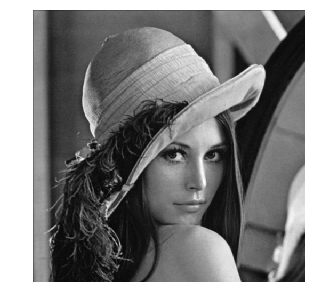

In [13]:
cv2.imwrite('gaussian_conv.png', img_conv_arr)
my_conv = cv2.imread('gaussian_conv.png')
plt.figure(figsize=(8, 5))
plt.axis("off")
plt.imshow(my_conv)

### Original VS Gaussian Convolution

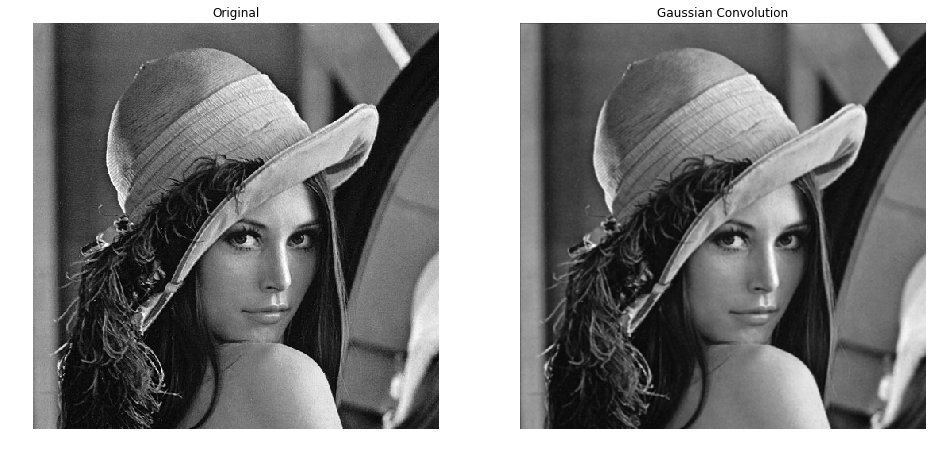

In [14]:
fig = plt.figure(figsize=(16, 25))

orig = cv2.imread('lena_gray.png')
conv = cv2.imread('gaussian_conv.png')

ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original')
ax1.imshow(orig)

ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Gaussian Convolution')
ax2.imshow(conv)